# Clasificación de Tweets

En este notebook se presentan los resultados de los experimentos para construir un modelo base de clasificación de la edad de los usuarios basados en el texto de los tweets.

Para facilitar la lectura de los resultados de cada experimento, se crea un modulo en python externo el cual se encarga de realizar el proceso de entrenamiento. Este modulo tiene el nombre: ModelTraining y usa la clase analizeTweets

Como modelo base se toma RandomForest, el cual es un modelo que generalmente se usa para establecer una linea base de comparación. No se realiza ningún ajuste a los hiperparametros de este modelo.

Los experimentos se realizan haciendo cambios sobre dos parametros del método "ModelTweet" buscando optimizar el accuracy del model. Estos dos parametros son:

- max_number_of_features (integer): Determina la cantidad de features para entrenar el modelo posterior a la vectorización de los textos.

- balanced_dataset (Y/N , string): Determina si el entrenamiento del modelo se hace con el dataset original (desbalanceado) o el modificado al cual se le agregan instancias al dataset para balancearlo.

En total se realizan seis experimentos para llegar a un accuracy de 70%, iniciando desde un accuracy de 33%.

Los rangos de edad con mejor rendimiento en la predicción fueron: 

- 65-xx (87% F1 Score)
- 13-17 (83% F1 Score)

El rango de edad con peor rendimiento en la predicción fue:

- 35-49 (51% F1 Score)

In [1]:
from ModelTraining import analizeTweets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

Step 1: Se importan los datos de Json para convertirlos en DataFrame usando pandas.

In [2]:
df = pd.read_json(r'C:\Users\roger\Documents\2021\@rogertovalle\Worki\Whale & Jaguar\wj-tests\Datascience\data\clasificador\clasificador.json')
df.head()

text age_range
0  @gusgomez1701 @YaKoDj @TropiBogota @Apple @Hua...     50-64
1  @jlmorales5 Sol Campbell, Per Mertesacker, Ver...     13-17
2  LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...     18-24
3                                    @munqueik roba3     18-24
4                                     Necesito ayuda     18-24

## Experimento #1: 

Resultado: Accuracy de 33%
Parametros:

- max_features: 1000
- balanced_data: N

Original distribution of the Data:


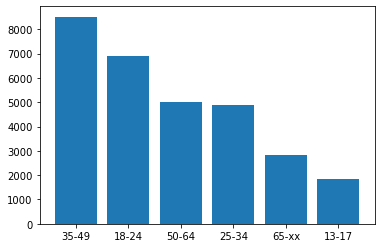

       age_range
35-49       8517
18-24       6902
50-64       5007
25-34       4893
65-xx       2830
13-17       1851


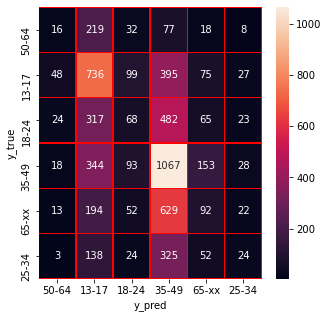

Metrics Confusion Matrix:
              precision    recall  f1-score   support

       13-17       0.13      0.04      0.07       370
       18-24       0.38      0.53      0.44      1380
       25-34       0.18      0.07      0.10       979
       35-49       0.36      0.63      0.46      1703
       50-64       0.20      0.09      0.13      1002
       65-xx       0.18      0.04      0.07       566

    accuracy                           0.33      6000
   macro avg       0.24      0.23      0.21      6000
weighted avg       0.28      0.33      0.28      6000

confusion matrix None


In [3]:
model = analizeTweets(df).modelTweets(RandomForestClassifier(), 1000, balance_dataset='N')

## Experimento #2: 

Resultado: Accuracy de 65%
Parametros:

- max_features: 1000
- balanced_data: Y

Sólo cambia el parametro balanced_data, este cambia hace que el accuracy practicamente se duplique.

Original distribution of the Data:


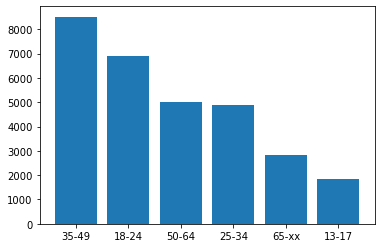

       age_range
35-49       8517
18-24       6902
50-64       5007
25-34       4893
65-xx       2830
13-17       1851
Original dataset shape 30000
Resample dataset shape 51102
Balanced distribution of the Data:


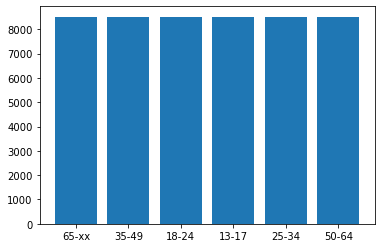

       age_range
65-xx       8517
35-49       8517
18-24       8517
13-17       8517
25-34       8517
50-64       8517


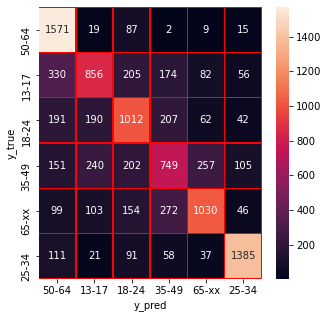

Metrics Confusion Matrix:
              precision    recall  f1-score   support

       13-17       0.64      0.92      0.76      1703
       18-24       0.60      0.50      0.55      1703
       25-34       0.58      0.59      0.59      1704
       35-49       0.51      0.44      0.47      1704
       50-64       0.70      0.60      0.65      1704
       65-xx       0.84      0.81      0.83      1703

    accuracy                           0.65     10221
   macro avg       0.64      0.65      0.64     10221
weighted avg       0.64      0.65      0.64     10221

confusion matrix None


In [4]:
model = analizeTweets(df).modelTweets(RandomForestClassifier(), 1000, balance_dataset='Y')

## Experimento #3: 

Resultado: Accuracy de 66%
Parametros:

- max_features: 1500
- balanced_data: Y

Se aumenta en un 50% la cantidad de features respecto al experimento anterior y se obtiene una mejora de 1%

Original distribution of the Data:


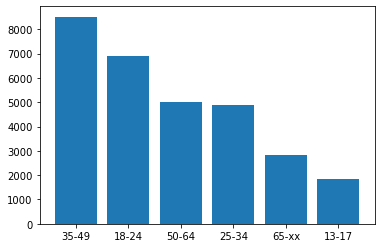

       age_range
35-49       8517
18-24       6902
50-64       5007
25-34       4893
65-xx       2830
13-17       1851
Original dataset shape 30000
Resample dataset shape 51102
Balanced distribution of the Data:


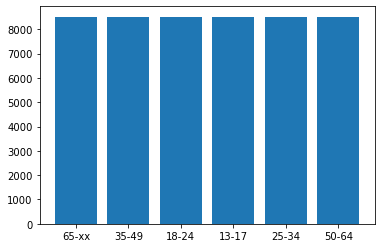

       age_range
65-xx       8517
35-49       8517
18-24       8517
13-17       8517
25-34       8517
50-64       8517


Metrics Confusion Matrix:
              precision    recall  f1-score   support

       13-17       0.66      0.94      0.77      1703
       18-24       0.60      0.52      0.56      1703
       25-34       0.60      0.61      0.60      1704
       35-49       0.52      0.44      0.48      1704
       50-64       0.70      0.62      0.66      1704
       65-xx       0.85      0.82      0.84      1703

    accuracy                           0.66     10221
   macro avg       0.66      0.66      0.65     10221
weighted avg       0.66      0.66      0.65     10221

confusion matrix None


In [5]:
model = analizeTweets(df).modelTweets(RandomForestClassifier(), 1500, balance_dataset='Y')

## Experimento #4: 

Resultado: Accuracy de 67%
Parametros:

- max_features: 3000
- balanced_data: Y

Se aumenta X2 la cantidad de features respecto al experimento anterior y se obtiene una mejora de 1%

Original distribution of the Data:


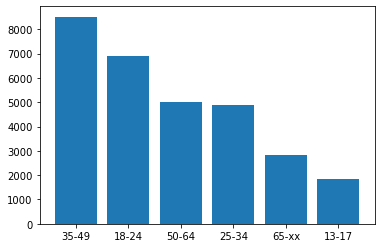

       age_range
35-49       8517
18-24       6902
50-64       5007
25-34       4893
65-xx       2830
13-17       1851
Original dataset shape 30000
Resample dataset shape 51102
Balanced distribution of the Data:


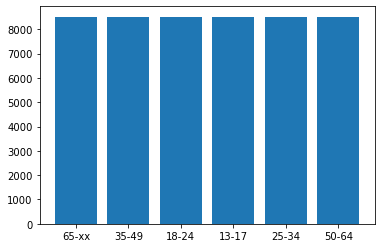

       age_range
65-xx       8517
35-49       8517
18-24       8517
13-17       8517
25-34       8517
50-64       8517


Metrics Confusion Matrix:
              precision    recall  f1-score   support

       13-17       0.68      0.95      0.79      1703
       18-24       0.61      0.55      0.58      1703
       25-34       0.61      0.61      0.61      1704
       35-49       0.52      0.46      0.48      1704
       50-64       0.72      0.62      0.66      1704
       65-xx       0.87      0.83      0.85      1703

    accuracy                           0.67     10221
   macro avg       0.67      0.67      0.66     10221
weighted avg       0.67      0.67      0.66     10221

confusion matrix None


In [6]:
model = analizeTweets(df).modelTweets(RandomForestClassifier(), 3000, balance_dataset='Y')

## Experimento #5: 

Resultado: Accuracy de 69%
Parametros:

- max_features: 6000
- balanced_data: Y

Se aumenta X2 la cantidad de features respecto al experimento anterior y se obtiene una mejora de 2%

Original distribution of the Data:


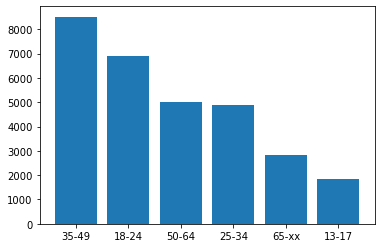

       age_range
35-49       8517
18-24       6902
50-64       5007
25-34       4893
65-xx       2830
13-17       1851
Original dataset shape 30000
Resample dataset shape 51102
Balanced distribution of the Data:


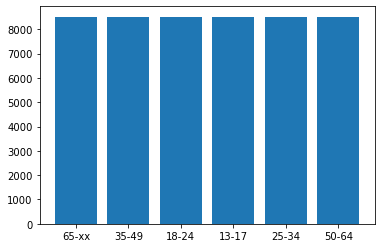

       age_range
65-xx       8517
35-49       8517
18-24       8517
13-17       8517
25-34       8517
50-64       8517


Metrics Confusion Matrix:
              precision    recall  f1-score   support

       13-17       0.71      0.95      0.81      1703
       18-24       0.62      0.59      0.61      1703
       25-34       0.64      0.63      0.64      1704
       35-49       0.53      0.47      0.50      1704
       50-64       0.75      0.64      0.69      1704
       65-xx       0.87      0.85      0.86      1703

    accuracy                           0.69     10221
   macro avg       0.69      0.69      0.68     10221
weighted avg       0.69      0.69      0.68     10221

confusion matrix None


In [7]:
model = analizeTweets(df).modelTweets(RandomForestClassifier(), 6000, balance_dataset='Y')

## Experimento #6: 

Resultado: Accuracy de 70%
Parametros:

- max_features: 9000
- balanced_data: Y

Se aumenta en un 50% la cantidad de features respecto al experimento anterior y se obtiene una mejora de 1%. El experimento inicialmente esperaba usar 12000 features pero para esta cantidad se generaba un error.

__

Original distribution of the Data:


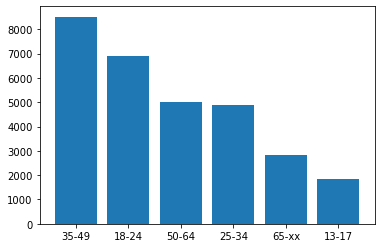

       age_range
35-49       8517
18-24       6902
50-64       5007
25-34       4893
65-xx       2830
13-17       1851
Original dataset shape 30000
Resample dataset shape 51102
Balanced distribution of the Data:


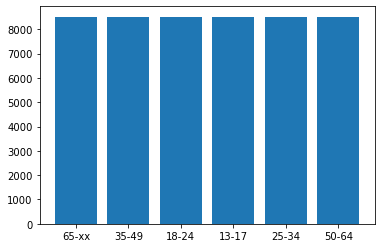

       age_range
65-xx       8517
35-49       8517
18-24       8517
13-17       8517
25-34       8517
50-64       8517


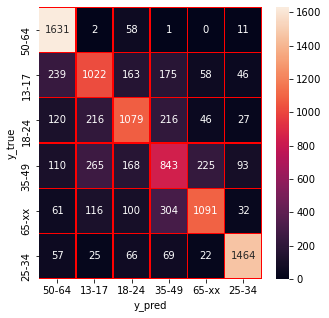

Metrics Confusion Matrix:
              precision    recall  f1-score   support

       13-17       0.74      0.96      0.83      1703
       18-24       0.62      0.60      0.61      1703
       25-34       0.66      0.63      0.65      1704
       35-49       0.52      0.49      0.51      1704
       50-64       0.76      0.64      0.69      1704
       65-xx       0.88      0.86      0.87      1703

    accuracy                           0.70     10221
   macro avg       0.70      0.70      0.69     10221
weighted avg       0.70      0.70      0.69     10221

confusion matrix None


In [8]:
model = analizeTweets(df).modelTweets(RandomForestClassifier(), 9000, balance_dataset='Y')